In [121]:
import numpy as np
import pandas as pd

In [122]:
df = pd.read_csv('Weekly.csv')

In [123]:
df.head(5)

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up


In [124]:
df['Direction'].value_counts()

Direction
Up      605
Down    484
Name: count, dtype: int64

a

In [125]:
df.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000
mean,2000.048669,0.150585,0.151079,0.147205,0.145818,0.139893,1.574618,0.149899
std,6.033182,2.357013,2.357254,2.360502,2.360279,2.361285,1.686636,2.356927
min,1990.000000,-18.195000,-18.195000,-18.195000,-18.195000,-18.195000,0.087465,-18.195000
25%,1995.000000,-1.154000,-1.154000,-1.158000,-1.158000,-1.166000,0.332022,-1.154000
50%,2000.000000,0.241000,0.241000,0.241000,0.238000,0.234000,1.002680,0.241000
75%,2005.000000,1.405000,1.409000,1.409000,1.409000,1.405000,2.053727,1.405000
max,2010.000000,12.026000,12.026000,12.026000,12.026000,12.026000,9.328214,12.026000


In [126]:
df.groupby('Year')['Direction'].value_counts()

Year  Direction
1990  Up           24
      Down         23
1991  Up           31
      Down         21
1992  Up           29
      Down         23
1993  Up           31
      Down         21
1994  Up           27
      Down         25
1995  Up           36
      Down         16
1996  Up           32
      Down         21
1997  Up           28
      Down         24
1998  Up           33
      Down         19
1999  Up           30
      Down         22
2000  Down         29
      Up           23
2001  Down         27
      Up           25
2002  Down         30
      Up           22
2003  Up           34
      Down         18
2004  Up           28
      Down         24
2005  Up           30
      Down         22
2006  Up           29
      Down         23
2007  Up           29
      Down         24
2008  Down         29
      Up           23
2009  Up           29
      Down         23
2010  Up           32
      Down         20
Name: count, dtype: int64

In [127]:
df['Check'] = df['Direction'] == 'Up'

In [128]:
df.corr(numeric_only=True)

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Check
Year,1.000000,-0.032289,-0.033390,-0.030006,-0.031128,-0.030519,0.841942,-0.032460,-0.022200
Lag1,-0.032289,1.000000,-0.074853,0.058636,-0.071274,-0.008183,-0.064951,-0.075032,-0.050004
Lag2,-0.033390,-0.074853,1.000000,-0.075721,0.058382,-0.072499,-0.085513,0.059167,0.072696
Lag3,-0.030006,0.058636,-0.075721,1.000000,-0.075396,0.060657,-0.069288,-0.071244,-0.022913
Lag4,-0.031128,-0.071274,0.058382,-0.075396,1.000000,-0.075675,-0.061075,-0.007826,-0.020549
Lag5,-0.030519,-0.008183,-0.072499,0.060657,-0.075675,1.000000,-0.058517,0.011013,-0.018168
Volume,0.841942,-0.064951,-0.085513,-0.069288,-0.061075,-0.058517,1.000000,-0.033078,-0.017995
Today,-0.032460,-0.075032,0.059167,-0.071244,-0.007826,0.011013,-0.033078,1.000000,0.720025
Check,-0.022200,-0.050004,0.072696,-0.022913,-0.020549,-0.018168,-0.017995,0.720025,1.000000


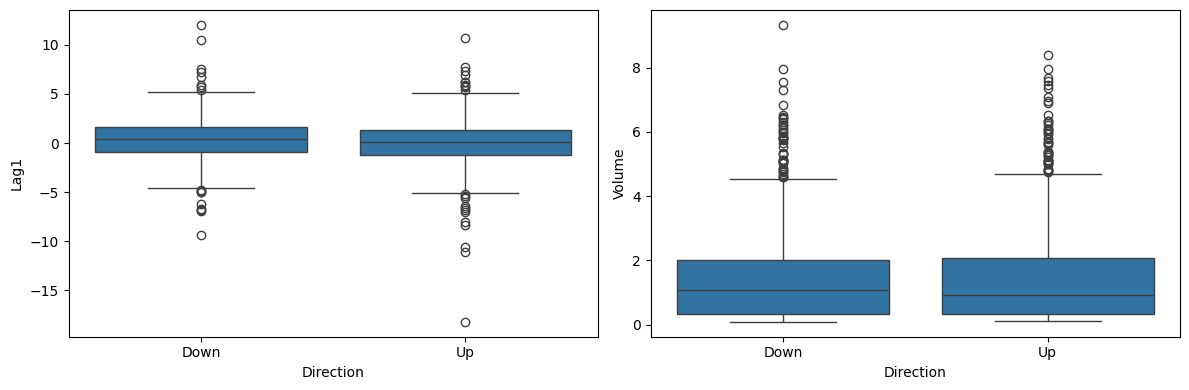

In [129]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axes = plt.subplots(1, 2, figsize=(12,4))
sns.boxplot(data=df, x='Direction', y='Lag1', ax=axes[0])
sns.boxplot(data=df, x='Direction', y='Volume', ax=axes[1])
plt.tight_layout(); plt.show()

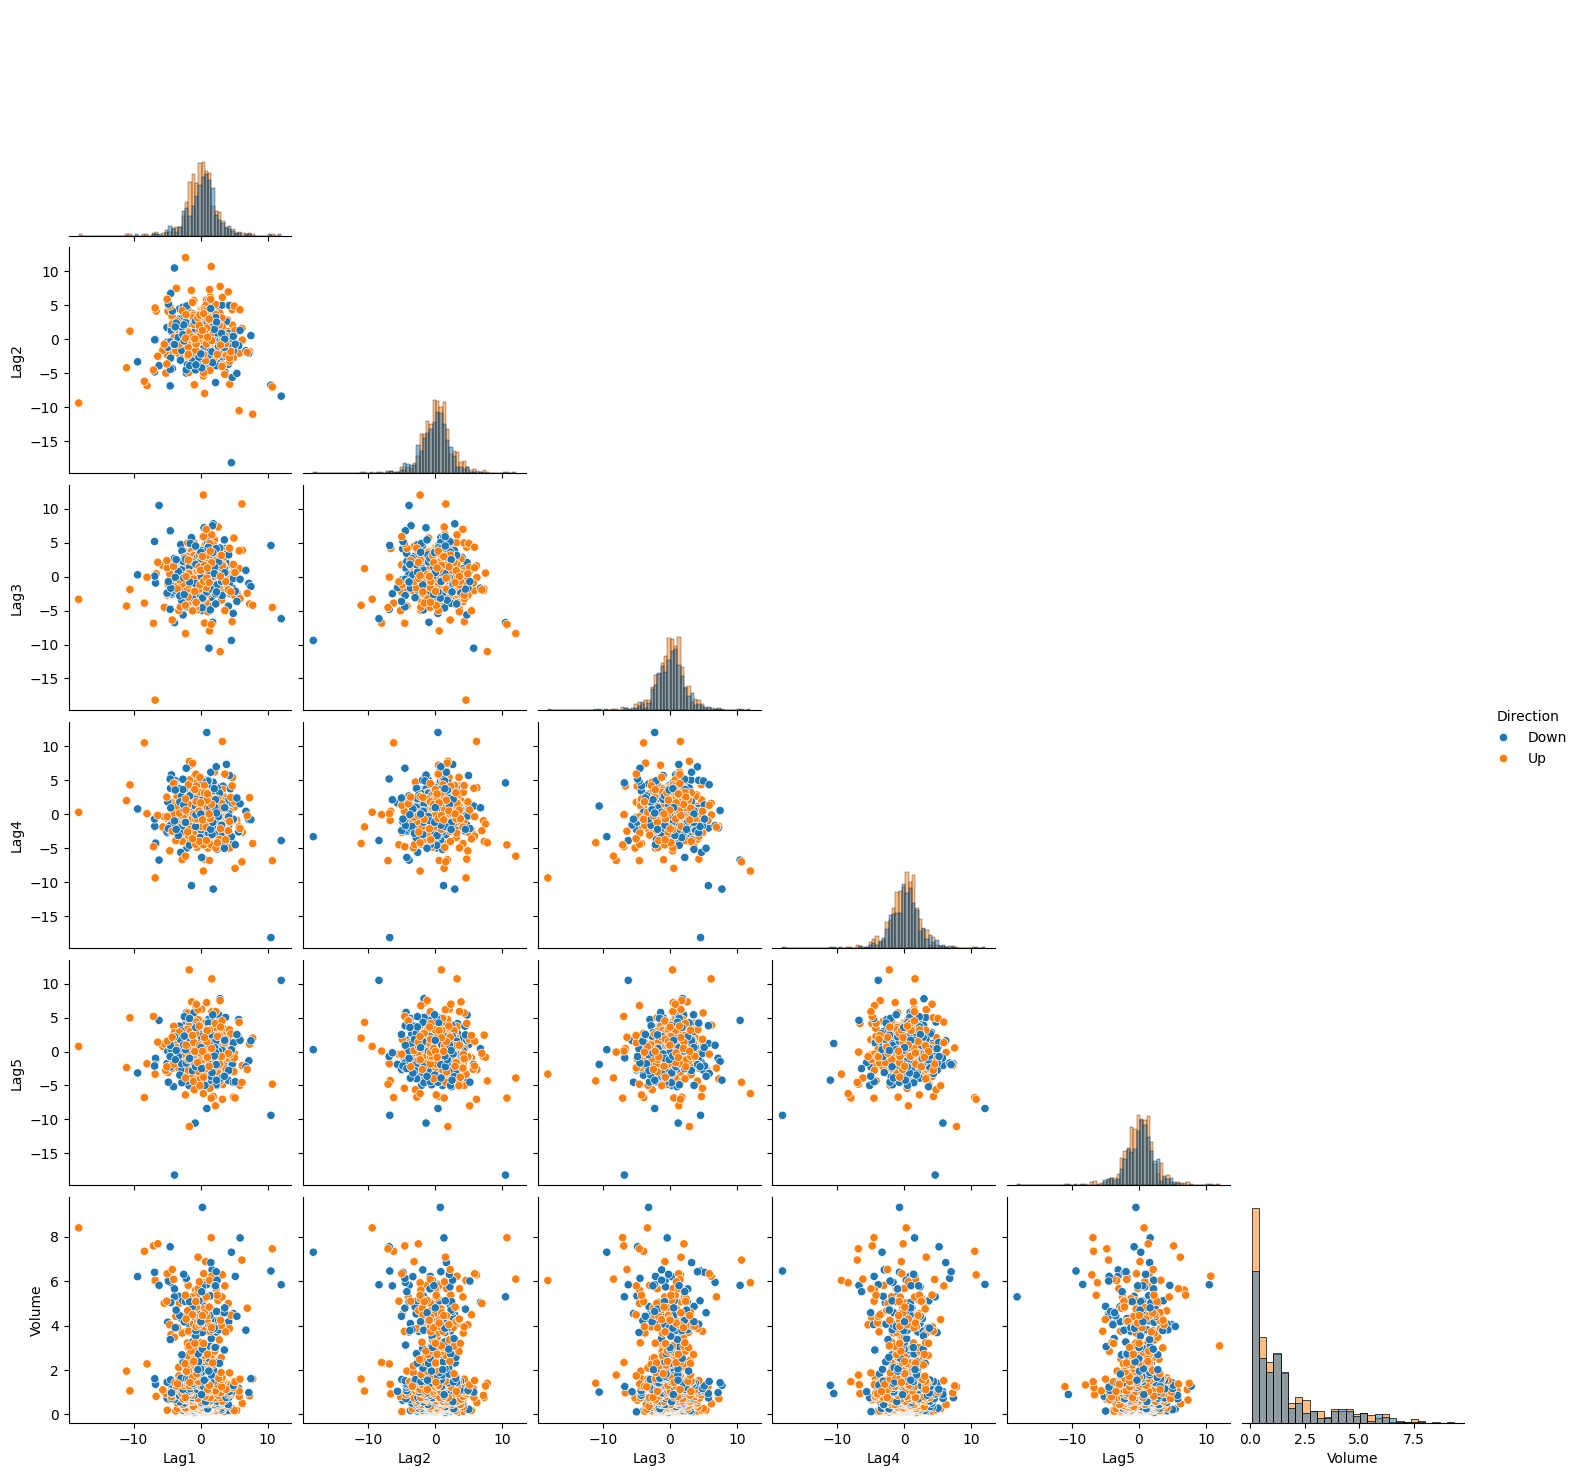

In [130]:
sns.pairplot(df, vars=['Lag1','Lag2','Lag3','Lag4','Lag5','Volume'], hue='Direction', corner=True, diag_kind='hist')
plt.show()

b

In [131]:
import statsmodels.api as sm
from ISLP.models import (ModelSpec as MS, summarize)
allvars = df.columns.drop(['Today', 'Direction', 'Year'])
design = MS(allvars)
X = design.fit_transform(df)
y = df.Direction == 'Up'
glm = sm.GLM(y,
             X,
             family=sm.families.Binomial())
results = glm.fit()
print(results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Direction   No. Observations:                 1089
Model:                            GLM   Df Residuals:                     1081
Model Family:                Binomial   Df Model:                            7
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.1613e-09
Date:                Tue, 30 Sep 2025   Deviance:                   2.3242e-09
Time:                        08:38:37   Pearson chi2:                 1.16e-09
No. Iterations:                    26   Pseudo R-squ. (CS):             0.7469
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    -27.5661   3.22e+04     -0.001      0.9

/Users/quant1wen/Library/Python/3.9/lib/python/site-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/Users/quant1wen/Library/Python/3.9/lib/python/site-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/Users/quant1wen/Library/Python/3.9/lib/python/site-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/Users/quant1wen/Library/Python/3.9/lib/python/site-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, para

c

In [132]:
from ISLP import confusion_table
pre = results.predict(X)
pre = (pre > 0.5)
print(confusion_table(pre, y))
print(f'Accuracy: {(pre == y).mean():.3f}')

Truth      False  True 
Predicted              
False        484      0
True           0    605
Accuracy: 1.000


d

In [133]:

train = df[df['Year'] <= 2008].copy()
test  = df[df['Year'] >= 2009].copy()

design = MS(['Lag2'])
X_tr = design.fit_transform(train)
X_te = design.transform(test)

y_tr = (train['Direction'] == 'Up')
y_te = (test['Direction'] == 'Up')
 
glm = sm.GLM(y_tr, X_tr, family=sm.families.Binomial())
result1 = glm.fit()
print(result1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Direction   No. Observations:                  985
Model:                            GLM   Df Residuals:                      983
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -675.27
Date:                Tue, 30 Sep 2025   Deviance:                       1350.5
Time:                        08:38:37   Pearson chi2:                     985.
No. Iterations:                     4   Pseudo R-squ. (CS):           0.004221
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.2033      0.064      3.162      0.0

In [134]:
p_te = result1.predict(X_te)
p_te = (p_te > 0.5)
print(confusion_table(p_te,y_te))
print(f'Accuracy: {(p_te == y_te).mean():.3f}')

Truth      False  True 
Predicted              
False          9      5
True          34     56
Accuracy: 0.625


e

In [135]:
from sklearn.discriminant_analysis import \
     (LinearDiscriminantAnalysis as LDA,
      QuadraticDiscriminantAnalysis as QDA)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [136]:
lda = LDA(store_covariance=True)
X_tr_np = X_tr.drop(columns=['intercept']).to_numpy()
X_te_np = X_te.drop(columns=['intercept']).to_numpy()
result2 = lda.fit(X_tr_np,y_tr)

In [137]:
result2.means_, result2.covariance_

(array([[-0.03568254],
        [ 0.26036581]]),
 array([[5.12177761]]))

In [138]:
p_te = result2.predict(X_te_np)
print(confusion_table(p_te,y_te))
print(f'Accuracy: {(p_te == y_te).mean():.3f}')

Truth      False  True 
Predicted              
False          9      5
True          34     56
Accuracy: 0.625


In [139]:
qda = QDA(store_covariance=True)
result3 = qda.fit(X_tr_np, y_tr)

In [140]:
qda.means_, qda.priors_

(array([[-0.03568254],
        [ 0.26036581]]),
 array([0.44771574, 0.55228426]))

In [141]:
p_te = result3.predict(X_te_np)
print(confusion_table(p_te,y_te))
print(f'Accuracy: {(p_te == y_te).mean():.3f}')

Truth      False  True 
Predicted              
False          0      0
True          43     61
Accuracy: 0.587


In [142]:
knn1 = KNeighborsClassifier(n_neighbors=1)
result4= knn1.fit(X_tr_np, y_tr)
knn1_pred = result4.predict(X_te_np)


In [143]:
print(confusion_table(knn1_pred,y_te))
print(f'Accuracy: {(knn1_pred == y_te).mean():.3f}')

Truth      False  True 
Predicted              
False         21     30
True          22     31
Accuracy: 0.500


In [144]:
NB = GaussianNB()
result5 = NB.fit(X_tr_np,y_tr)

In [145]:
nb_labels = result5.predict(X_te_np)
print(confusion_table(nb_labels, y_te))
print(f'Accuracy: {(nb_labels == y_te).mean():.3f}')

Truth      False  True 
Predicted              
False          0      0
True          43     61
Accuracy: 0.587


In [146]:
accs = {}

# Logit(Lag2)
accs["Logit(Lag2)"] = ((result1.predict(X_te)>0.5)== y_te).mean()
# LDA
accs["LDA(Lag2)"] = (result2.predict(X_te_np) == y_te).mean()
# QDA
accs["QDA(Lag2)"] = (result3.predict(X_te_np) == y_te).mean()
# KNN k=1
accs["KNN(k=1,Lag2)"] = (result4.predict(X_te_np) == y_te).mean()
# NB
accs["NB(Lag2)"] = (result5.predict(X_te_np) == y_te).mean()

for k, v in accs.items():
    print(f"- {k}: {v:.3f}")
best_name = max(accs, key=accs.get)
print(f"\nBest on this split: {best_name} (accuracy={accs[best_name]:.3f})")

- Logit(Lag2): 0.625
- LDA(Lag2): 0.625
- QDA(Lag2): 0.587
- KNN(k=1,Lag2): 0.500
- NB(Lag2): 0.587

Best on this split: Logit(Lag2) (accuracy=0.625)


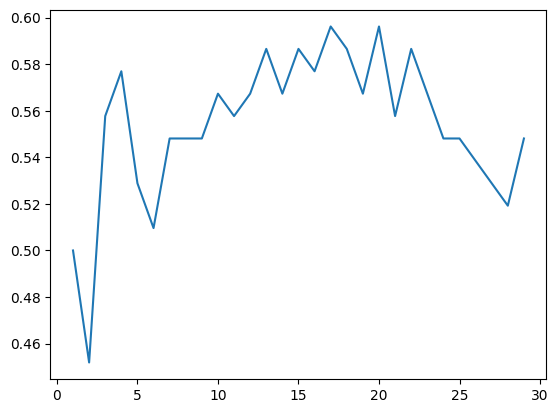

In [147]:
knn_layer = []
k=30
for i in range(1,k):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_tr_np, y_tr)
    knn_layer.append((knn.predict(X_te_np)==y_te).mean())
y = [i for i in range(1,k)]
plt.plot(y,knn_layer)


In [148]:

from sklearn.pipeline import make_pipeline
def _to_updown_from_bool(arr_bool):
    arr_bool = np.asarray(arr_bool)
    return np.where(arr_bool, "Up", "Down")


    

In [149]:
def run_weekly_experiment(
    df: pd.DataFrame,
    features: list,
    model_name: str = "logit",    
    standardize: bool = False,         
    interaction_only: bool = False,   
    knn_k: int = 1,                  
    threshold: float = 0.5,            
    verbose: bool = True,                
):
    train = df[df["Year"] <= 2008].copy()
    test  = df[df["Year"] >= 2008].copy()
    y_tr_bool = (train["Direction"] == "Up").to_numpy()
    y_te_bool = (test["Direction"] == "Up").to_numpy()
    y_te_str  = _to_updown_from_bool(y_te_bool)
    X_tr = train[features].to_numpy()
    X_te = test[features].to_numpy()
    y_pred_str = None
    fitted = None
    if model_name.lower() == "logit":
        X_tr_sm = sm.add_constant(X_tr, has_constant="add")
        X_te_sm = sm.add_constant(X_te, has_constant="add")
        logit = sm.Logit(y_tr_bool.astype(int), X_tr_sm)
        fitted = logit.fit(disp=False)
        proba = fitted.predict(X_te_sm)
        y_pred_str = np.where(proba >= threshold, "Up", "Down")
    elif model_name.lower() == "lda":
        lda = LDA(store_covariance=True)
        fitted = lda.fit(X_tr, y_tr_bool)
        pred = fitted.predict(X_te)            
        y_pred_str = _to_updown_from_bool(pred)
    elif model_name.lower() == "qda":
        qda = QDA()
        fitted = qda.fit(X_tr, y_tr_bool)
        pred = fitted.predict(X_te)
        y_pred_str = _to_updown_from_bool(pred)
    elif model_name.lower() == "knn":
        knn = KNeighborsClassifier(n_neighbors=knn_k)
        fitted = knn.fit(X_tr, y_tr_bool)
        pred = fitted.predict(X_te)
        y_pred_str = _to_updown_from_bool(pred)
    elif model_name.lower() == "nb":
        nb = GaussianNB()
        fitted = nb.fit(X_tr, y_tr_bool)
        pred = fitted.predict(X_te)
        y_pred_str = _to_updown_from_bool(pred)
    acc = (y_pred_str == y_te_str).mean()
    cm_pd = pd.crosstab(pd.Series(y_te_str, name="True"),
                        pd.Series(y_pred_str, name="Pred"),
                        dropna=False)
    cm_islp = confusion_table(y_pred_str, y_te_str)

    if verbose:
        print(f"\n=== {model_name} | features={features} ===")
        print(f"Accuracy: {acc:.3f}")
        print("Confusion matrix (pandas crosstab, rows=true, cols=pred):")
        print(cm_pd)
        if cm_islp is not None:
            print("\n(ISLP confusion_table)")
            print(cm_islp)

    return {
        "features": features,
        "model_name": model_name,
        "acc": acc,
        "cm_pandas": cm_pd,
        "cm_islp": cm_islp,
        "y_true": y_te_str,
        "y_pred": y_pred_str,
        "fitted": fitted
    }

In [150]:
def evaluate_many(
    df: pd.DataFrame,
    features_list: list[list[str]],
    model_grid: list[dict],
    **common_kwargs
):
    results = []
    rows = []
    for feats in features_list:
        for spec in model_grid:
            res = run_weekly_experiment(
                df=df,
                features=feats,
                **spec,
                **common_kwargs
            )
            results.append(res)
            rows.append({
                "features": "+".join(feats),
                "model": spec.get("model_name"),
                "standardize": spec.get("standardize", False),
                "poly_degree": spec.get("poly_degree"),
                "interaction_only": spec.get("interaction_only"),
                "knn_k": spec.get("knn_k"),
                "acc": res["acc"],
            })
    summary = pd.DataFrame(rows).sort_values("acc", ascending=False).reset_index(drop=True)
    return results, summary

In [151]:

res_lda = run_weekly_experiment(df, ["Lag1","Lag2"], model_name="lda", verbose=True)


=== lda | features=['Lag1', 'Lag2'] ===
Accuracy: 0.558
Confusion matrix (pandas crosstab, rows=true, cols=pred):
Pred  Down  Up
True          
Down    14  58
Up      11  73

(ISLP confusion_table)
Truth      Down  Up
Predicted          
Down         14  11
Up           58  73


In [152]:
import itertools
ALL_FEATS = ["Lag1","Lag2","Lag3","Lag4","Lag5","Volume"]

feat_combos = []
for k in [1, 2, 3]:
    feat_combos += list(itertools.combinations(ALL_FEATS, k))


model_grid = [
    {"model_name": "logit"},
    {"model_name": "lda"},
    {"model_name": "qda"},
    {"model_name": "nb"},
]

rows = []
results_dict = {} 
for feats in feat_combos:
    feats = list(feats)
    for spec in model_grid:
        res = run_weekly_experiment(
            df,
            features=feats,
            **spec,
            verbose=False 
        )
        key = (spec["model_name"], tuple(feats), spec.get("knn_k"))
        results_dict[key] = res
        rows.append({
            "model": spec["model_name"],
            "features": "+".join(feats),
            "k": spec.get("knn_k", np.nan),
            "acc": res["acc"]
        })

summary = pd.DataFrame(rows).sort_values("acc", ascending=False).reset_index(drop=True)
print("Top-10 combinations by accuracy:")
display(summary.head(10))



Top-10 combinations by accuracy:


,model,features,k,acc
0,logit,Lag1+Lag2+Lag4,NaN,0.589744
1,lda,Lag1+Lag2+Lag4,NaN,0.589744
2,qda,Lag1+Lag3,NaN,0.589744
3,logit,Lag2+Lag3+Lag5,NaN,0.576923
4,lda,Lag2+Lag3+Lag5,NaN,0.576923
5,logit,Lag2+Lag3+Volume,NaN,0.576923
6,lda,Lag2+Lag3+Volume,NaN,0.576923
7,lda,Lag2+Lag3,NaN,0.570513
8,logit,Lag2,NaN,0.570513
9,lda,Lag2,NaN,0.570513


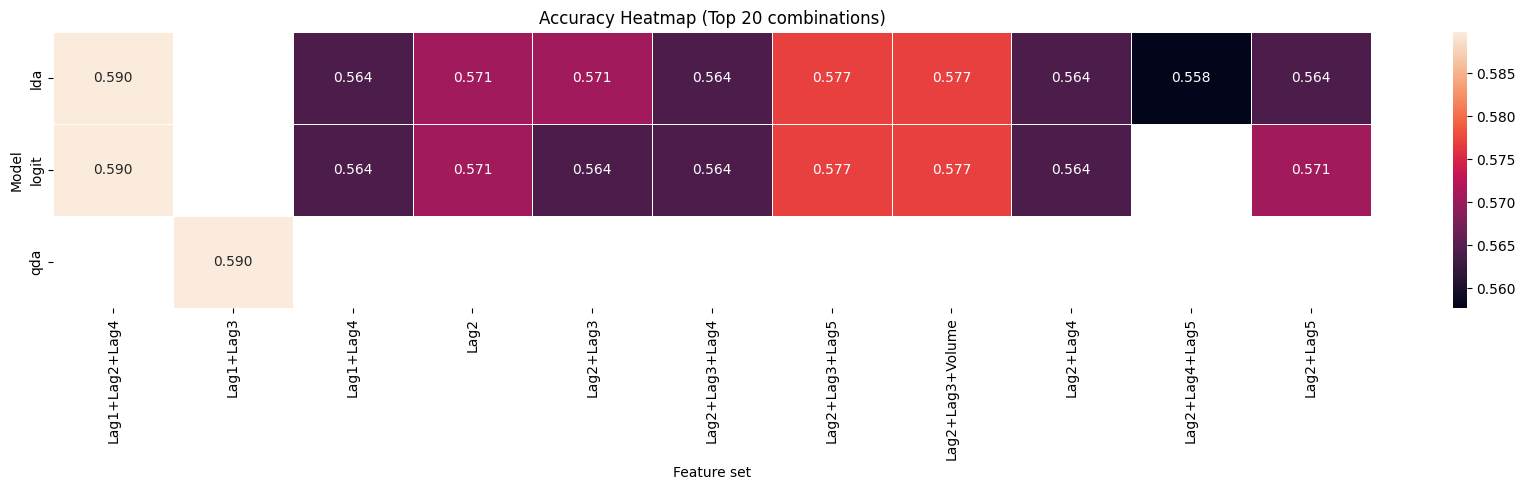

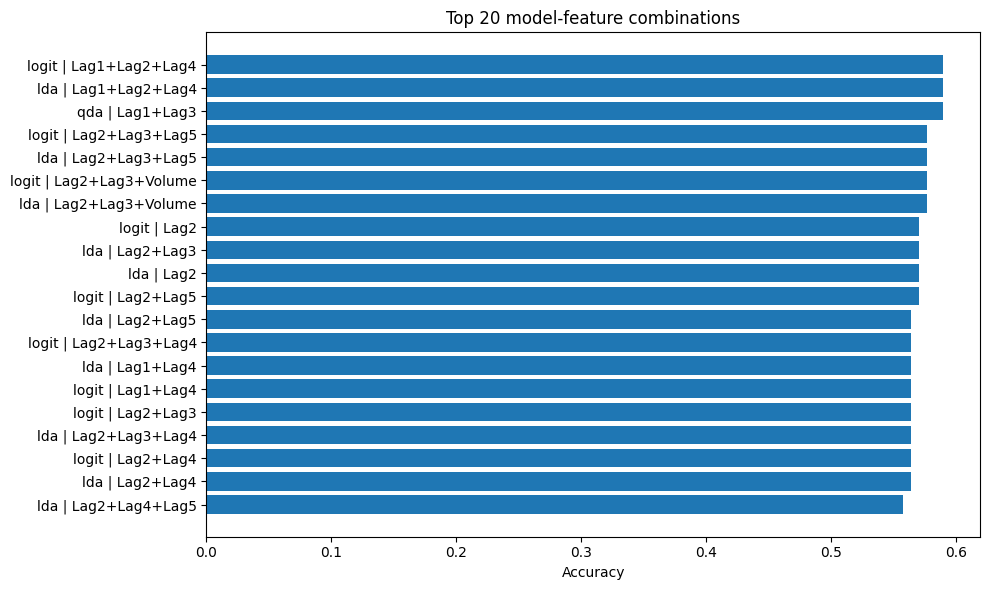

In [153]:
N = 20
topN = summary.head(N).copy()

def label_row(r):
    if r["model"].lower() == "knn":
        return f"KNN(k={int(r['k'])})"
    return r["model"]

topN["model_label"] = topN.apply(label_row, axis=1)

 
heat_df = topN.pivot_table(index="model_label", columns="features", values="acc")
plt.figure(figsize=(min(1.2*len(heat_df.columns)+4, 24), 1.0*len(heat_df.index)+2))
sns.heatmap(heat_df, annot=True, fmt=".3f", linewidths=0.5, cbar=True)
plt.title(f"Accuracy Heatmap (Top {N} combinations)")
plt.xlabel("Feature set")
plt.ylabel("Model")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
bar_df = topN.copy()
bar_df["combo"] = bar_df["model_label"] + " | " + bar_df["features"]
bar_df = bar_df.sort_values("acc", ascending=True)
plt.barh(bar_df["combo"], bar_df["acc"])
plt.xlabel("Accuracy")
plt.title(f"Top {N} model-feature combinations")
plt.tight_layout()
plt.show()

In [154]:

res_lda = run_weekly_experiment(df, ["Lag1","Lag2",'Lag4'], model_name="lda", verbose=True)


=== lda | features=['Lag1', 'Lag2', 'Lag4'] ===
Accuracy: 0.590
Confusion matrix (pandas crosstab, rows=true, cols=pred):
Pred  Down  Up
True          
Down    18  54
Up      10  74

(ISLP confusion_table)
Truth      Down  Up
Predicted          
Down         18  10
Up           54  74


In [155]:

res_lda = run_weekly_experiment(df, ["Lag1","Lag2",'Lag4'], model_name="logit", verbose=True)


=== logit | features=['Lag1', 'Lag2', 'Lag4'] ===
Accuracy: 0.590
Confusion matrix (pandas crosstab, rows=true, cols=pred):
Pred  Down  Up
True          
Down    18  54
Up      10  74

(ISLP confusion_table)
Truth      Down  Up
Predicted          
Down         18  10
Up           54  74
